In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import plotly.express as px

In [106]:
df=pd.read_csv('./kidney_disease.csv')

In [107]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [108]:
df.shape

(400, 26)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [110]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [111]:
df.drop('id',axis=1,inplace=True)

In [112]:
df.columns=['Age','Blood_Pressure','Specific_Gravity','Albumin','Sugar','Red_Blood_Cells','Pus_Cell','Pus_Cell_Clumps','Bacteria','Blood_Glucose_Random','Blooad_Urea','Serum_Creatinine','Sodium','Potassium','Hemoglobin','Packed_Cell_Volume','White_Blood_Cell_Count','Red_Blood_Cell_Count','Hypertension','Diabetes_Mellitus','Coronary_Arery_Diesease','Appetite','Peda_Edema','Aanemia','Class']

In [113]:
df

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Arery_Diesease,Appetite,Peda_Edema,Aanemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blooad_Urea              381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [115]:
df['Packed_Cell_Volume'].isnull().sum()

70

In [116]:
df['Packed_Cell_Volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [117]:
df['Packed_Cell_Volume']=pd.to_numeric(df['Packed_Cell_Volume'],errors='coerce')

In [118]:
df['Packed_Cell_Volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blooad_Urea              381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [120]:
df['White_Blood_Cell_Count']=pd.to_numeric(df['White_Blood_Cell_Count'],errors='coerce')

In [121]:
df['Red_Blood_Cell_Count']=pd.to_numeric(df['Red_Blood_Cell_Count'],errors='coerce')

In [122]:
categorical_col=[col for col in df.columns if df[col].dtype == 'O']

In [123]:
categorical_col

['Red_Blood_Cells',
 'Pus_Cell',
 'Pus_Cell_Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes_Mellitus',
 'Coronary_Arery_Diesease',
 'Appetite',
 'Peda_Edema',
 'Aanemia',
 'Class']

In [124]:
numerical_col=[col for col in df.columns if df[col].dtype != 'O']

In [125]:
numerical_col

['Age',
 'Blood_Pressure',
 'Specific_Gravity',
 'Albumin',
 'Sugar',
 'Blood_Glucose_Random',
 'Blooad_Urea',
 'Serum_Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed_Cell_Volume',
 'White_Blood_Cell_Count',
 'Red_Blood_Cell_Count']

In [126]:
for col in categorical_col:
    print(f"{col} has unique value is : {df[col].unique()}\n")

Red_Blood_Cells has unique value is : [nan 'normal' 'abnormal']

Pus_Cell has unique value is : ['normal' 'abnormal' nan]

Pus_Cell_Clumps has unique value is : ['notpresent' 'present' nan]

Bacteria has unique value is : ['notpresent' 'present' nan]

Hypertension has unique value is : ['yes' 'no' nan]

Diabetes_Mellitus has unique value is : ['yes' 'no' ' yes' '\tno' '\tyes' nan]

Coronary_Arery_Diesease has unique value is : ['no' 'yes' '\tno' nan]

Appetite has unique value is : ['good' 'poor' nan]

Peda_Edema has unique value is : ['no' 'yes' nan]

Aanemia has unique value is : ['no' 'yes' nan]

Class has unique value is : ['ckd' 'ckd\t' 'notckd']



In [127]:
df['Diabetes_Mellitus'].replace(to_replace= {'yes':'yes','no':'no',' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)

In [128]:
df['Coronary_Arery_Diesease'].replace(to_replace={'\tno':'no'},inplace=True)

In [129]:
df['Class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [130]:
for col in categorical_col:
    print(f"{col} has unique value is : {df[col].unique()}\n")

Red_Blood_Cells has unique value is : [nan 'normal' 'abnormal']

Pus_Cell has unique value is : ['normal' 'abnormal' nan]

Pus_Cell_Clumps has unique value is : ['notpresent' 'present' nan]

Bacteria has unique value is : ['notpresent' 'present' nan]

Hypertension has unique value is : ['yes' 'no' nan]

Diabetes_Mellitus has unique value is : ['yes' 'no' nan]

Coronary_Arery_Diesease has unique value is : ['no' 'yes' nan]

Appetite has unique value is : ['good' 'poor' nan]

Peda_Edema has unique value is : ['no' 'yes' nan]

Aanemia has unique value is : ['no' 'yes' nan]

Class has unique value is : ['ckd' 'notckd']



In [131]:
df.shape

(400, 25)

In [132]:
df['Class']=df['Class'].map({'ckd':0,'notckd':1})

In [133]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [134]:
#Univariate Analysis

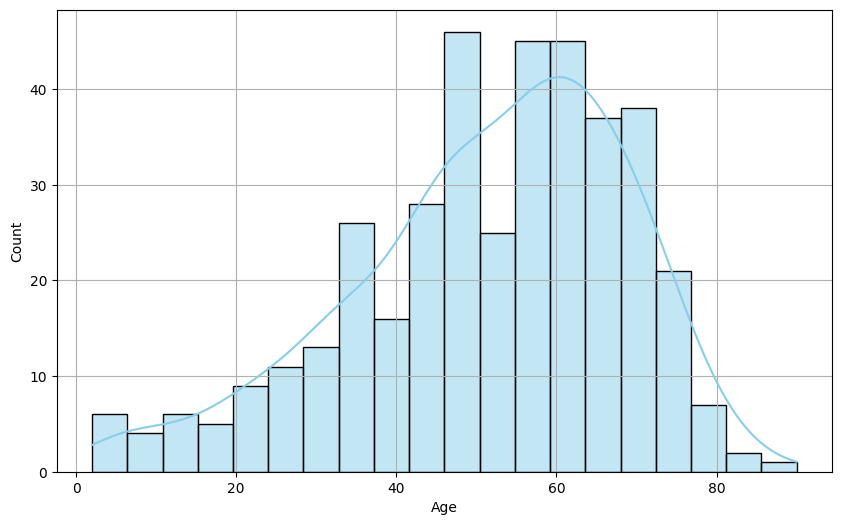

In [135]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(),kde=True,bins=20,color='skyblue')
plt.grid()

In [136]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blooad_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Arery_Diesease', 'Appetite',
       'Peda_Edema', 'Aanemia', 'Class'],
      dtype='object')

<Axes: xlabel='Hypertension', ylabel='count'>

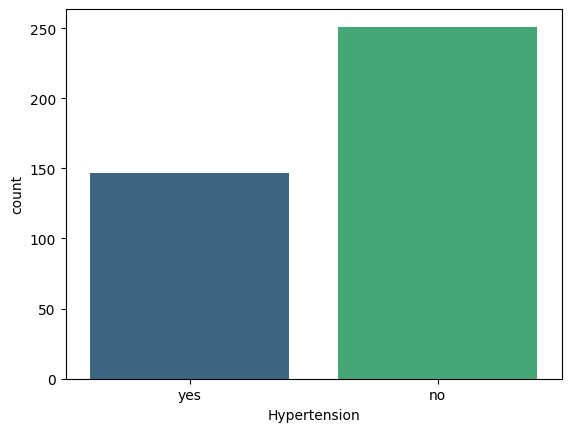

In [137]:
sns.countplot(x=df['Hypertension'].dropna(),palette='viridis',data=df)

In [138]:
df['Blooad_Urea']

0      36.0
1      18.0
2      53.0
3      56.0
4      26.0
       ... 
395    49.0
396    31.0
397    26.0
398    50.0
399    18.0
Name: Blooad_Urea, Length: 400, dtype: float64

<Axes: xlabel='Class', ylabel='Blooad_Urea'>

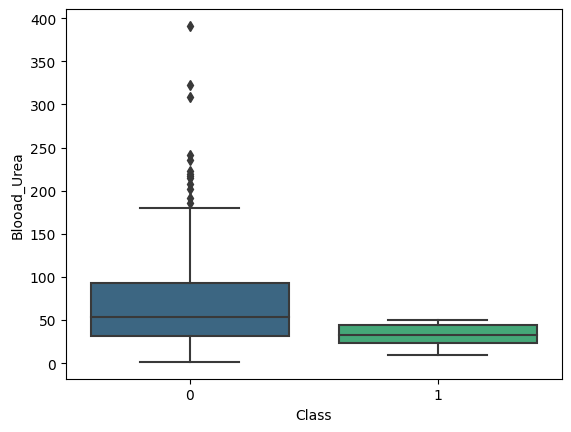

In [139]:
sns.boxplot(y=df['Blooad_Urea'],x='Class',data=df,palette='viridis')

<Axes: xlabel='Class', ylabel='Serum_Creatinine'>

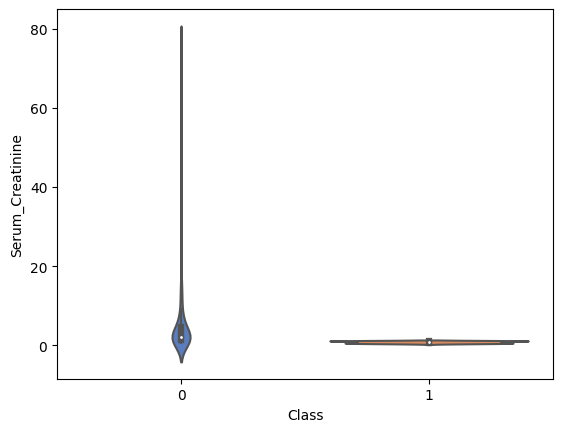

In [140]:
sns.violinplot(x=df['Class'],y=df['Serum_Creatinine'],data=df,palette='muted')

In [141]:
df['Aanemia'].unique()

array(['no', 'yes', nan], dtype=object)

<Axes: xlabel='Aanemia', ylabel='count'>

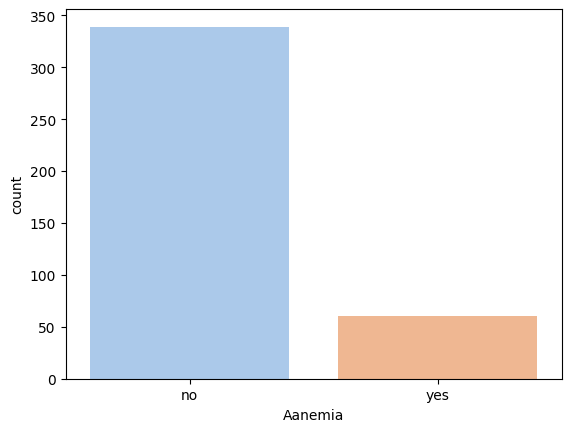

In [142]:
sns.countplot(x=df['Aanemia'],data=df,palette='pastel')

In [143]:
df['Appetite'].unique()

array(['good', 'poor', nan], dtype=object)

<Axes: ylabel='Appetite'>

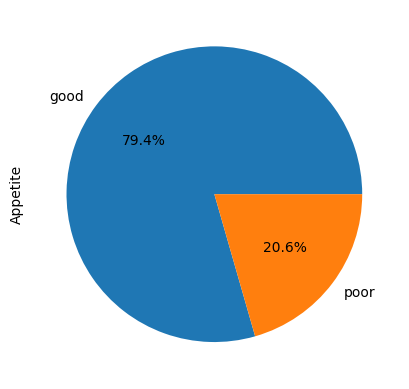

In [144]:
df['Appetite'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Pus_Cell_Clumps', ylabel='count'>

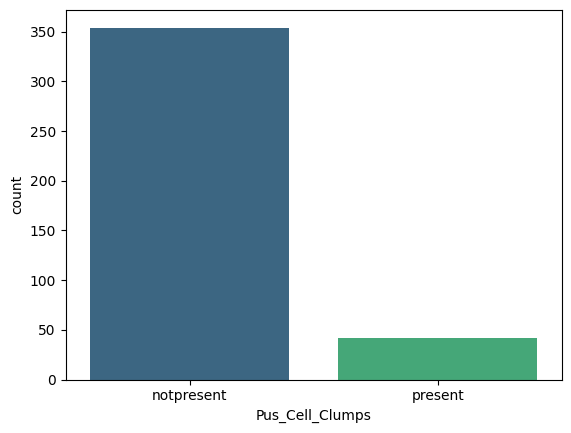

In [145]:
sns.countplot(x=df['Pus_Cell_Clumps'],data=df,palette='viridis')

<Axes: xlabel='White_Blood_Cell_Count', ylabel='Count'>

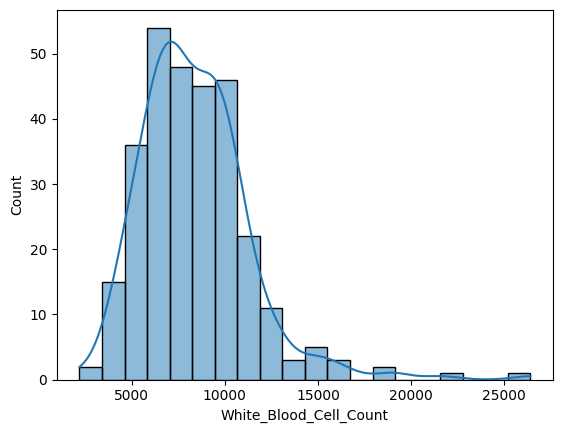

In [146]:
sns.histplot(df['White_Blood_Cell_Count'].dropna(),bins=20,kde=True)

<Axes: ylabel='Diabetes_Mellitus'>

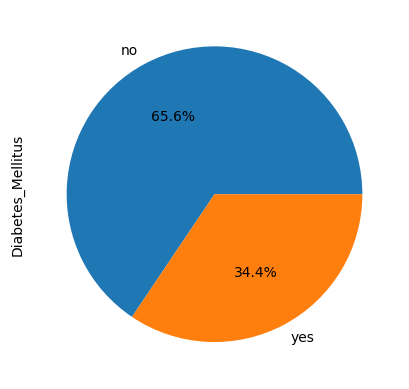

In [147]:
df['Diabetes_Mellitus'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Age', ylabel='Blood_Pressure'>

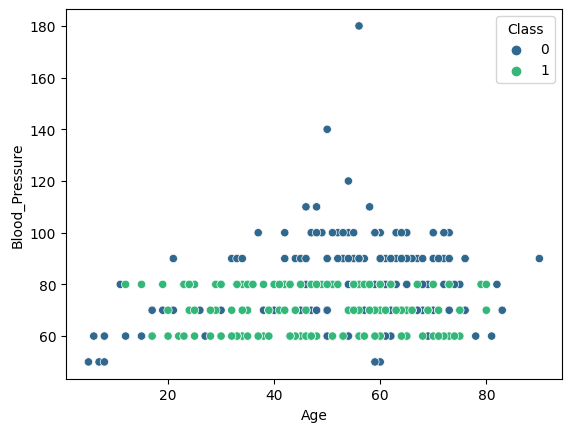

In [148]:
sns.scatterplot(x=df['Age'],y=df['Blood_Pressure'],hue='Class',data=df,palette='viridis')

<Axes: xlabel='Diabetes_Mellitus', ylabel='Albumin'>

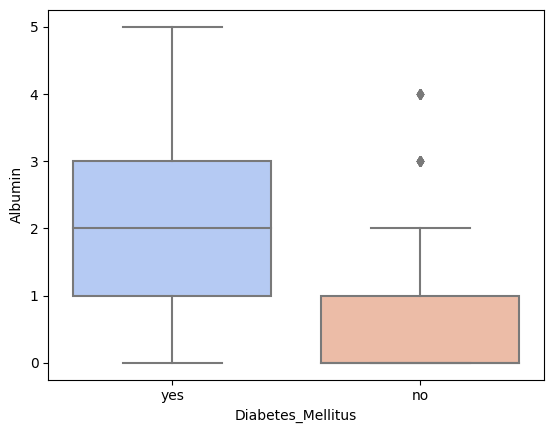

In [149]:
sns.boxplot(x=df['Diabetes_Mellitus'],y=df['Albumin'],data=df,palette='coolwarm')

In [150]:
cols=['Age','Blood_Pressure','Blood_Glucose_Random','Serum_Creatinine']

C:\Users\satyam saurabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\satyam saurabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\satyam saurabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\satyam saurabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\satyam saurabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `

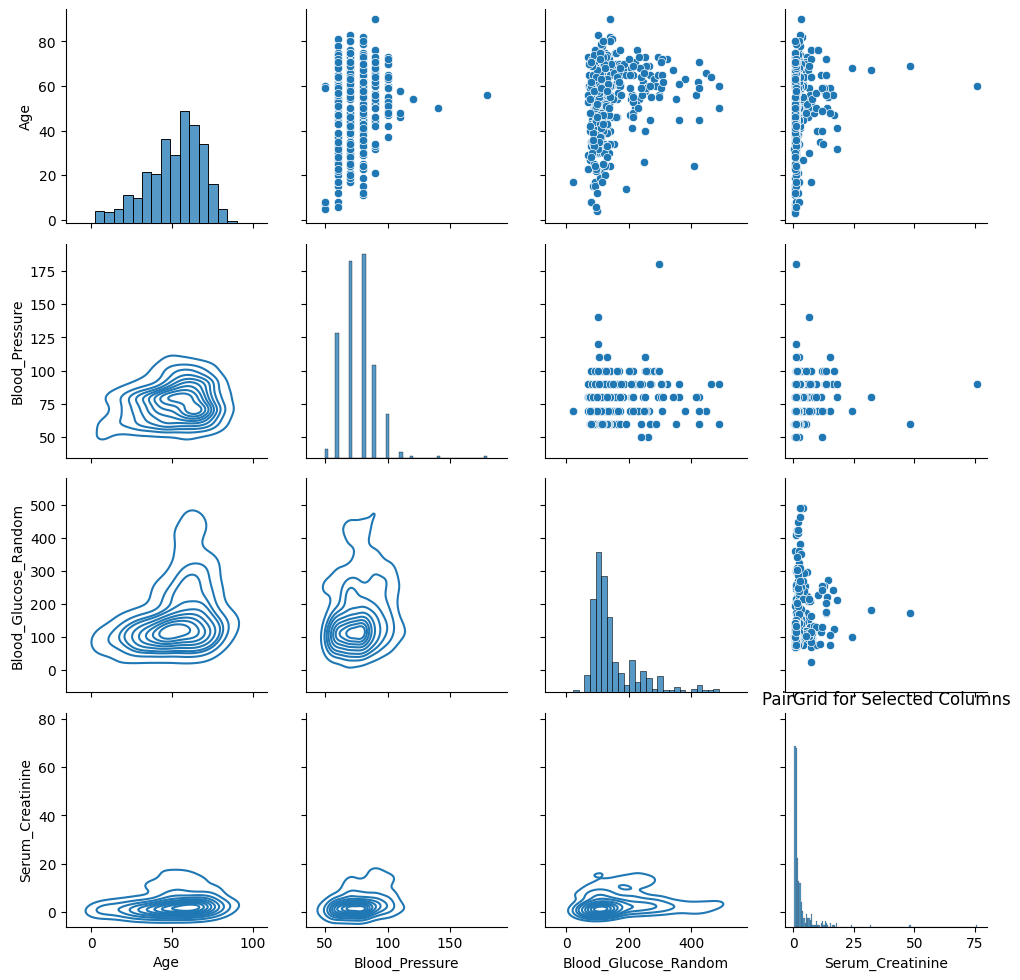

In [151]:

g=sns.PairGrid(df[cols],palette='coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.title('PairGrid for Selected Columns')
plt.show()

In [152]:
df.corr(numeric_only=True)

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blooad_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Class
Age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,-0.227268
Blood_Pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,-0.294077
Specific_Gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,0.732163
Albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,-0.627090
Sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,-0.344070
Blood_Glucose_Random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,-0.419672
Blooad_Urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,-0.380605
Serum_Creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,-0.299969
Sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,0.375674
Potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,-0.084541


C:\Users\satyam saurabh\AppData\Local\Temp\ipykernel_21400\654681063.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<Axes: >

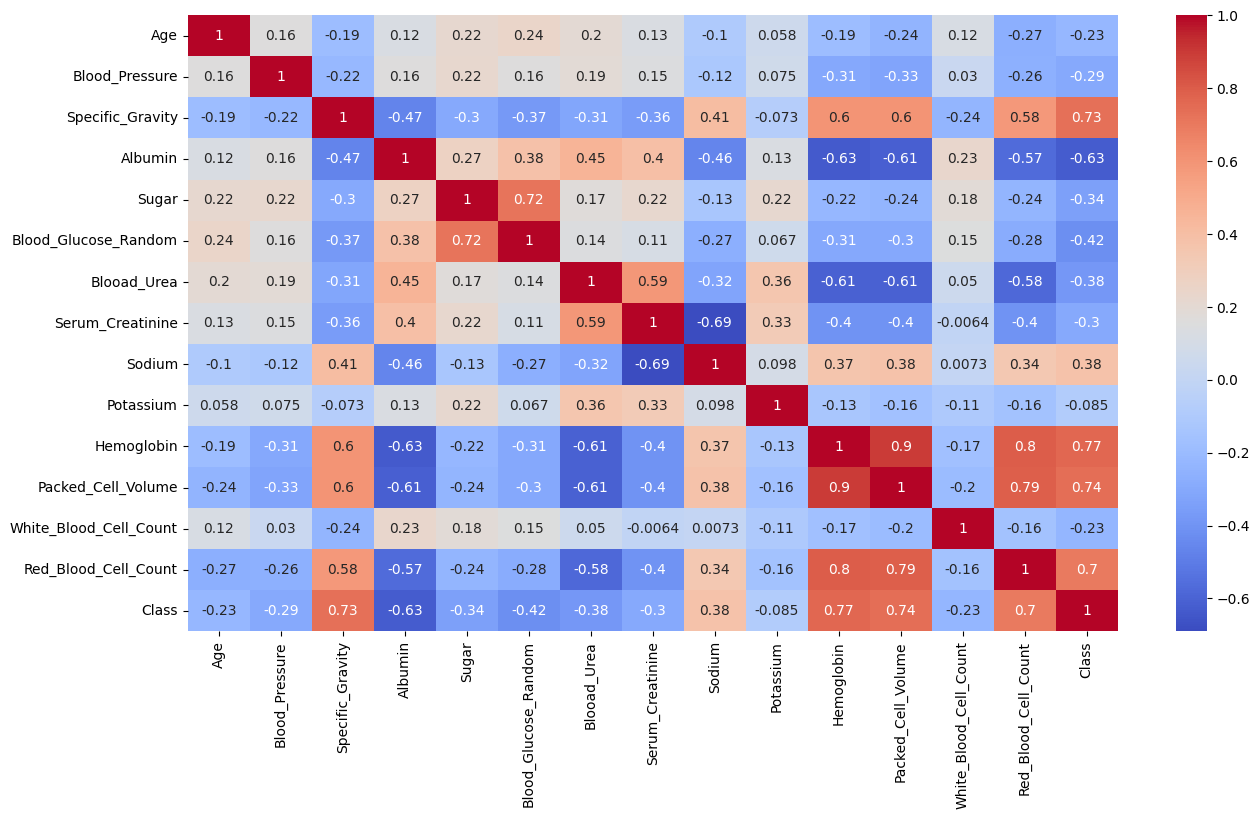

In [153]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<Axes: xlabel='Diabetes_Mellitus', ylabel='Age'>

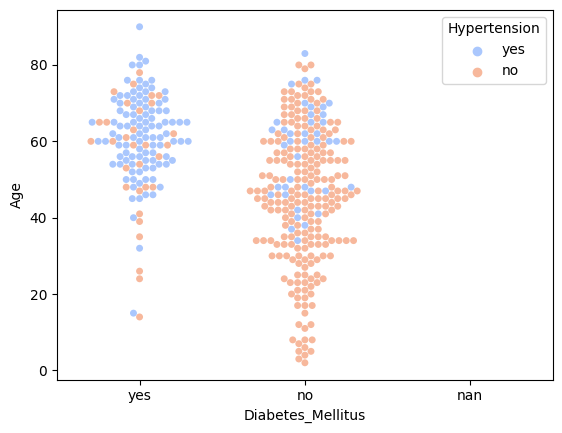

In [154]:
sns.swarmplot(x=df['Diabetes_Mellitus'],y=df['Age'],hue=df['Hypertension'],data=df,palette='coolwarm')

In [156]:
# fig=px.scatter(df,x=df['Age'],y=df['Blood_Pressure'],color='Class',hover_data =['Serum_Creatinine','Haemoglobin'])
# fig.show()

In [157]:
df.head(20)

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Arery_Diesease,Appetite,Peda_Edema,Aanemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,0
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,0
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,0
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,0
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,0


In [158]:
# Correlation Analysis:
# 1.What are the correlations between numerical variables like Age, Blood Pressure, Blood Glucose Random, Packed Cell Volume, and White Blood Cell Count?
# 2.Is there a significant correlation between Blood Glucose Random and Diabetes Mellitus?

# Comparative Analysis:
# 3.How do Age, Blood Pressure, and Blood Glucose Random compare between patients with and without Hypertension?
# 4.How do the levels of Albumin and Sugar vary between different classes?

# Feature Importance:
# 5.Which features are the most important predictors for the class variable?
# 6.How does Packed Cell Volume influence the likelihood of having a specific class?

# Missing Data Analysis:
# 7.Which features have the most missing data?
# 8.How does the presence of missing data affect the prediction of the class?

# Descriptive Statistics:
# 9.What are the mean, median, and standard deviation of numerical features like Age and Blood Pressure?
# 10.What is the distribution of specific gravity across different age groups?

# Association Rules:
# 11.Are there any notable associations between Pus Cell Clumps and Bacteria presence?
# 12.How often do Hypertension and Diabetes Mellitus co-occur in the dataset?

# Trend Analysis:
# 13.Are there any observable trends in Blood Glucose Random across different age groups?
# 14.Does Packed Cell Volume vary with Age?

# Classification:
# 15.How well can a logistic regression model predict the class based on key features?
# 16.What is the accuracy of a Random Forest classifier on this dataset?

# Clustering:
# 17.Can we identify distinct clusters of patients based on their lab results?
# 18.How do these clusters relate to the class variable?

# Time Series Analysis (if applicable):
# 19.Are there any time-dependent patterns in the data, such as seasonal variations in Blood Glucose Random levels?
# 20.How do Blood Pressure readings change over time for patients with different classes?

# Survival Analysis (if applicable):
# 21.What are the survival rates for different classes?
# 22.How do factors like Blood Pressure and Age affect survival rates?

# Hypothesis Testing:
# 23.Is there a significant difference in Blood Glucose Random levels between patients with and without Diabetes Mellitus?
# 24.Does the presence of Pus Cell Clumps significantly affect the class?

# Outlier Detection:
# 25.Are there any outliers in the Blood Glucose Random values?
# 26.How do outliers in Age affect the analysis?

# Principal Component Analysis (PCA):
# 27.How many principal components are needed to explain most of the variance in the dataset?
# 28.How do the principal components separate the classes?

# Chi-Square Test:
# 29.Is there a significant association between Red Blood Cells and the class?
# 30.How does the presence of Pus Cell Clumps relate to the class?

# ANOVA:
# 31.Are there significant differences in Blood Glucose Random levels across different levels of Albumin?
# 32.How do White Blood Cell Counts vary across different classes?
# 33.What does the correlation heatmap of numerical variables look like?

# Box Plots:
# 34.How do Age, Blood Pressure, and Blood Glucose Random distributions differ across classes?
# 35.What are the distributions of Packed Cell Volume for different classes?

# Violin Plots:
# 36.How does the distribution of Blood Glucose Random vary for patients with and without Diabetes Mellitus?

# Histograms:
# 37.What is the age distribution of patients in the dataset?
# 38.How are the Blood Glucose Random values distributed?

# Scatter Plots:
# 39.What is the relationship between Age and Blood Glucose Random?
# 40.How do Packed Cell Volume and White Blood Cell Count relate?

# Pair Plots:
# 41.How do numerical variables pairwise relate to each other and the class?

# Bar Charts:
# 42.What is the frequency of different levels of Albumin across classes?
# 43.How common is the presence of Pus Cell Clumps in the dataset?

# Line Charts:
# 44.How do Blood Pressure readings vary with Age?
# 45.Are there any trends in Blood Glucose Random values over time?

# Stacked Bar Charts:
# 46.How do the counts of different levels of Red Blood Cells vary across classes?

# Pie Charts:
# 47.What is the proportion of patients with different classes?
# 48.How is the distribution of Pus Cell Clumps?

# Heatmaps:
# 49.How does Packed Cell Volume vary across different levels of Age and Blood Pressure?

# 3D Scatter Plots:
# 50.How do Age, Blood Pressure, and Blood Glucose Random relate in a 3D space?

# Boxen Plots:
# 51.What are the distributions of Blood Glucose Random and Packed Cell Volume?

# Density Plots:
# 52.What is the density distribution of Blood Glucose Random?

# Swarm Plots:
# 53.How are Blood Pressure values distributed across different classes?

# Facet Grids:
# 54.How do multiple variables like Age and Blood Pressure vary together across different levels of another categorical variable?

# Hexbin Plots:
# 55.What is the hexbin plot of Age and Blood Glucose Random?

# Lollipop Charts:
# 56.How does Blood Glucose Random vary across different levels of Albumin?


In [159]:
df

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Arery_Diesease,Appetite,Peda_Edema,Aanemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


In [160]:
df['Age'].unique()

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

<Axes: xlabel='Age'>

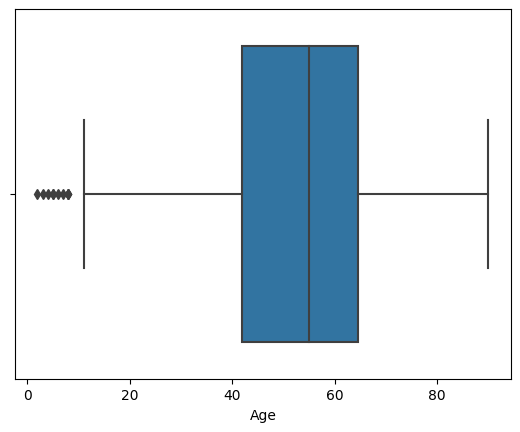

In [161]:
sns.boxplot(x=df['Age'],data=df)

In [162]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [163]:
df['Age'].isnull().sum()

0

In [164]:
df['Age'].unique()

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., 55., 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 44., 26., 64., 56.,  5., 74.,
       38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66., 81.,
       14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78., 19.,
        2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

In [165]:
df['Blood_Pressure'].unique()

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

In [166]:
df['Blood_Pressure'].dtype

dtype('float64')

<Axes: xlabel='Blood_Pressure'>

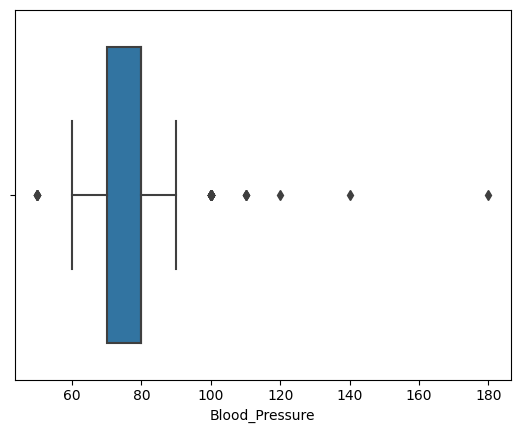

In [167]:
sns.boxplot(x=df['Blood_Pressure'],data=df)

In [168]:
df['Blood_Pressure']=df['Blood_Pressure'].fillna(df['Blood_Pressure'].median())

In [169]:
df['Blood_Pressure'].isnull().sum()

0

<Axes: xlabel='Specific_Gravity'>

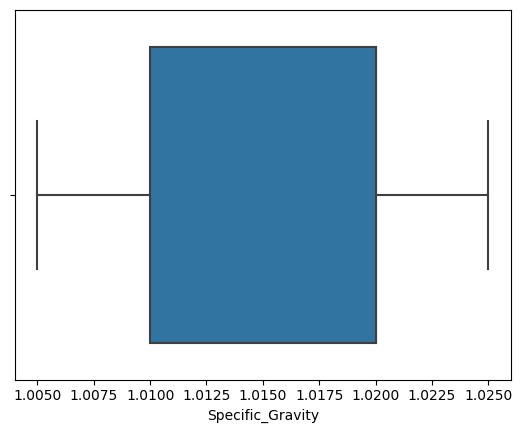

In [170]:
df['Specific_Gravity'].unique()
sns.boxplot(x=df['Specific_Gravity'],data=df)

In [171]:
df['Specific_Gravity']=df['Specific_Gravity'].fillna(df['Specific_Gravity'].mean())

In [172]:
df['Specific_Gravity'].isnull().sum()

0

In [173]:
df['Albumin'].isnull().sum()

46

<Axes: xlabel='Albumin'>

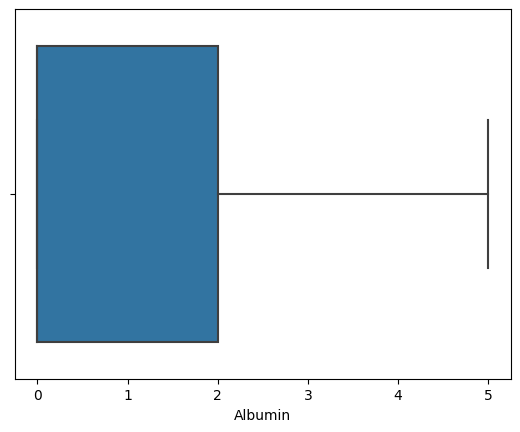

In [174]:
sns.boxplot(x=df['Albumin'],data=df)

In [175]:
df['Albumin']=df['Albumin'].fillna(df['Albumin'].mean())

In [176]:
df['Albumin'].isnull().sum()

0

In [177]:
df['Sugar'].unique()

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

<Axes: xlabel='Sugar'>

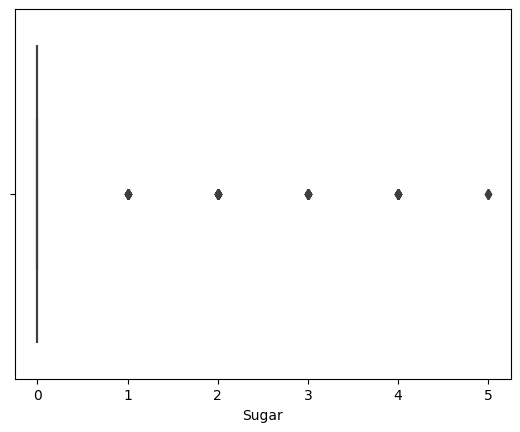

In [178]:
sns.boxplot(x=df['Sugar'],data=df)

In [179]:
df['Sugar']=df['Sugar'].fillna(df['Sugar'].median())

In [180]:
df["Sugar"].unique()

array([0., 3., 4., 1., 2., 5.])

In [181]:
df['Red_Blood_Cells'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [190]:
import statistics

In [188]:
df['Red_Blood_Cells']=df['Red_Blood_Cells'].fillna(statistics.mode(df['Red_Blood_Cells']))

In [189]:
df['Red_Blood_Cells'].unique()

array(['normal', 'abnormal'], dtype=object)

In [191]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blooad_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Arery_Diesease', 'Appetite',
       'Peda_Edema', 'Aanemia', 'Class'],
      dtype='object')

In [194]:
df['Pus_Cell'].unique()

array(['normal', 'abnormal'], dtype=object)

In [193]:
df['Pus_Cell']=df['Pus_Cell'].fillna(statistics.mode(df['Pus_Cell']))

In [197]:
df['Pus_Cell_Clumps'].unique()

array(['notpresent', 'present'], dtype=object)

In [196]:
df['Pus_Cell_Clumps']=df['Pus_Cell_Clumps'].fillna(statistics.mode(df['Pus_Cell_Clumps']))

In [200]:
df['Bacteria'].unique()

array(['notpresent', 'present'], dtype=object)

In [199]:
df['Bacteria']=df['Bacteria'].fillna(statistics.mode(df['Bacteria']))

In [204]:
df['Blood_Glucose_Random'].unique()

array([121., 423., 117., 106.,  74., 100., 410., 138.,  70., 490., 380.,
       208.,  98., 157.,  76.,  99., 114., 263., 173.,  95., 108., 156.,
       264., 123.,  93., 107., 159., 140., 171., 270.,  92., 137., 204.,
        79., 207., 124., 144.,  91., 162., 246., 253., 141., 182.,  86.,
       150., 146., 425., 112., 250., 360., 163., 129., 133., 102., 158.,
       165., 132., 104., 127., 415., 169., 251., 109., 280., 210., 219.,
       295.,  94., 172., 101., 298., 153.,  88., 226., 143., 115.,  89.,
       297., 233., 294., 323., 125.,  90., 308., 118., 224., 128., 122.,
       214., 213., 268., 256.,  84., 105., 288., 139.,  78., 273., 242.,
       424., 303., 148., 160., 192., 307., 220., 447., 309.,  22., 111.,
       261., 215., 234., 131., 352.,  80., 239., 110., 130., 184., 252.,
       113., 230., 341., 255., 103., 238., 248., 120., 241., 269., 201.,
       203., 463., 176.,  82., 119.,  97.,  96.,  81., 116., 134.,  85.,
        83.,  87.,  75.])

<Axes: xlabel='Blood_Glucose_Random'>

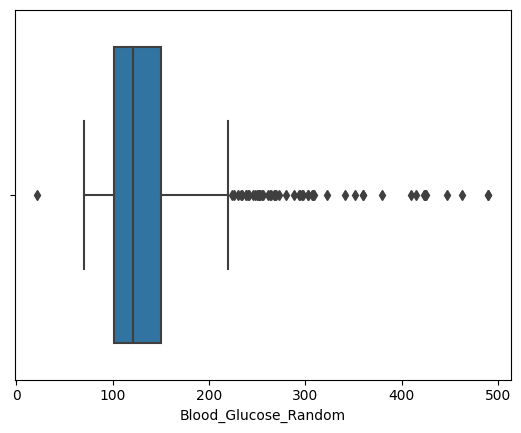

In [205]:
sns.boxplot(x=df['Blood_Glucose_Random'],data=df)

In [203]:
# df['Blood_Glucose_Random']=df['Blood_Glucose_Random'].fillna(df['Blood_Glucose_Random'].median())

In [209]:
df['Blooad_Urea'].unique()

array([ 36. ,  18. ,  53. ,  56. ,  26. ,  25. ,  54. ,  31. ,  60. ,
       107. ,  55. ,  72. ,  86. ,  90. , 162. ,  46. ,  87. ,  27. ,
       148. , 180. , 163. ,  42. ,  50. ,  75. ,  45. ,  28. , 155. ,
        33. ,  39. , 153. ,  29. ,  65. , 103. ,  70. ,  80. ,  20. ,
       202. ,  77. ,  89. ,  24. ,  17. ,  32. , 114. ,  66. ,  38. ,
       164. , 142. ,  96. , 391. ,  15. , 111. ,  73. ,  19. ,  92. ,
        35. ,  16. , 139. ,  48. ,  85. ,  98. , 186. ,  37. ,  47. ,
        52. ,  82. ,  51. , 106. ,  22. , 217. ,  88. , 118. ,  50.1,
        71. ,  34. ,  40. ,  21. , 219. ,  30. , 125. , 166. ,  49. ,
       208. , 176. ,  68. , 145. , 165. , 322. ,  23. , 235. , 132. ,
        76. ,  44. ,  41. , 113. ,   1.5, 146. ,  58. , 133. , 137. ,
        67. , 115. , 223. ,  98.6, 158. ,  94. ,  74. , 150. ,  61. ,
        57. ,  95. , 191. ,  93. , 241. ,  64. ,  79. , 215. , 309. ,
        10. ])

<Axes: xlabel='Blooad_Urea'>

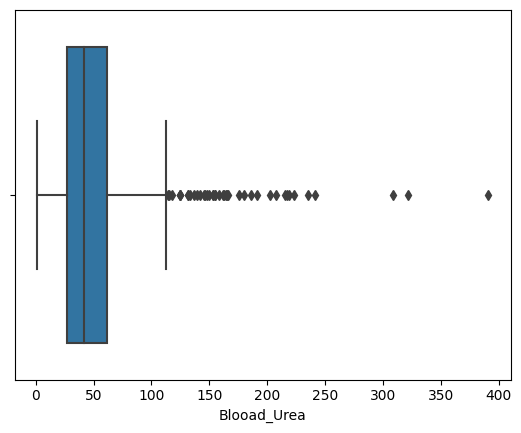

In [210]:
sns.boxplot(x=df['Blooad_Urea'],data=df)

In [208]:
df['Blooad_Urea']=df['Blooad_Urea'].fillna(df['Blooad_Urea'].median())

In [211]:
df['Serum_Creatinine'].unique()

array([ 1.2 ,  0.8 ,  1.8 ,  3.8 ,  1.4 ,  1.1 , 24.  ,  1.9 ,  7.2 ,
        4.  ,  2.7 ,  2.1 ,  4.6 ,  4.1 ,  9.6 ,  2.2 ,  5.2 ,  1.3 ,
        1.6 ,  3.9 , 76.  ,  7.7 ,   nan,  2.4 ,  7.3 ,  1.5 ,  2.5 ,
        2.  ,  3.4 ,  0.7 ,  1.  , 10.8 ,  6.3 ,  5.9 ,  0.9 ,  3.  ,
        3.25,  9.7 ,  6.4 ,  3.2 , 32.  ,  0.6 ,  6.1 ,  3.3 ,  6.7 ,
        8.5 ,  2.8 , 15.  ,  2.9 ,  1.7 ,  3.6 ,  5.6 ,  6.5 ,  4.4 ,
       10.2 , 11.5 ,  0.5 , 12.2 ,  5.3 ,  9.2 , 13.8 , 16.9 ,  6.  ,
        7.1 , 18.  ,  2.3 , 13.  , 48.1 , 14.2 , 16.4 ,  2.6 ,  7.5 ,
        4.3 , 18.1 , 11.8 ,  9.3 ,  6.8 , 13.5 , 12.8 , 11.9 , 12.  ,
       13.4 , 15.2 , 13.3 ,  0.4 ])

<Axes: xlabel='Serum_Creatinine'>

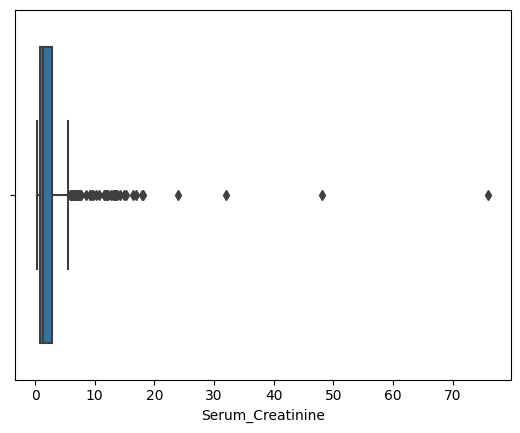

In [212]:
sns.boxplot(x=df['Serum_Creatinine'],data=df)

In [215]:
df['Serum_Creatinine']=df['Serum_Creatinine'].fillna(df['Serum_Creatinine'].median())

In [220]:
df['Sodium'].unique()

array([  nan, 111. , 142. , 104. , 114. , 131. , 138. , 135. , 130. ,
       141. , 139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. ,
       125. , 163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. ,
       147. , 124. , 115. , 145. , 113. , 120. , 150. , 144. ])

<Axes: xlabel='Sodium'>

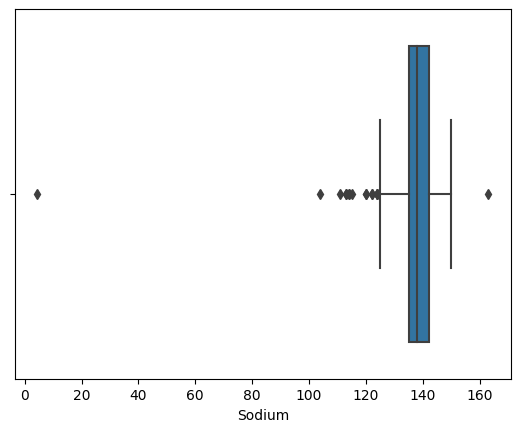

In [221]:
sns.boxplot(x=df['Sodium'],data=df)

In [223]:
df['Sodium']=df['Sodium'].fillna(df['Sodium'].median())

In [224]:
df['Sodium'].unique()

array([138. , 111. , 142. , 104. , 114. , 131. , 135. , 130. , 141. ,
       139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. , 125. ,
       163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. , 147. ,
       124. , 115. , 145. , 113. , 120. , 150. , 144. ])

In [225]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blooad_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Arery_Diesease', 'Appetite',
       'Peda_Edema', 'Aanemia', 'Class'],
      dtype='object')

<Axes: xlabel='Potassium'>

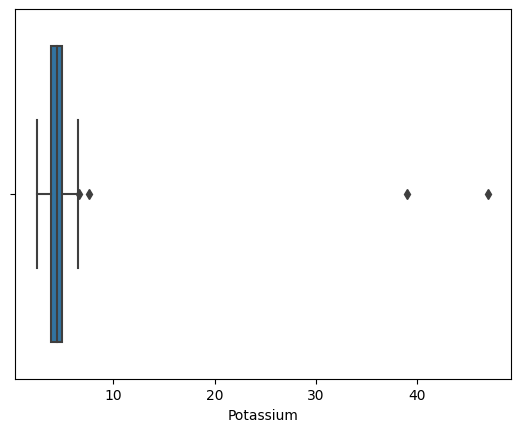

In [226]:
sns.boxplot(x=df['Potassium'],data=df)

In [227]:
df['Potassium']=df['Potassium'].fillna(df['Potassium'].median())

In [228]:
df['Hemoglobin'].unique()

array([15.4, 11.3,  9.6, 11.2, 11.6, 12.2, 12.4, 10.8,  9.5,  9.4,  9.7,
        9.8,  5.6,  7.6, 12.6, 12.1, 12.7, 10.3,  7.7, 10.9,  nan, 11.1,
        9.9, 12.5, 12.9, 10.1, 12. , 13. ,  7.9,  9.3, 15. , 10. ,  8.6,
       13.6, 10.2, 10.5,  6.6, 11. ,  7.5, 15.6, 15.2,  4.8,  9.1,  8.1,
       11.9, 13.5,  8.3,  7.1, 16.1, 10.4,  9.2,  6.2, 13.9, 14.1,  6. ,
       11.8, 11.7, 11.4, 14. ,  8.2, 13.2,  6.1,  8. , 12.3,  8.4, 14.3,
        9. ,  8.7, 10.6, 13.1, 10.7,  5.5,  5.8,  6.8,  8.8,  8.5, 13.8,
       11.5,  7.3, 13.7, 12.8, 13.4,  6.3,  3.1, 17. , 15.9, 14.5, 15.5,
       16.2, 14.4, 14.2, 16.3, 14.8, 16.5, 15.7, 13.3, 14.6, 16.4, 16.9,
       16. , 14.7, 16.6, 14.9, 16.7, 16.8, 15.8, 15.1, 17.1, 17.2, 15.3,
       17.3, 17.4, 17.7, 17.8, 17.5, 17.6])

<Axes: xlabel='Hemoglobin'>

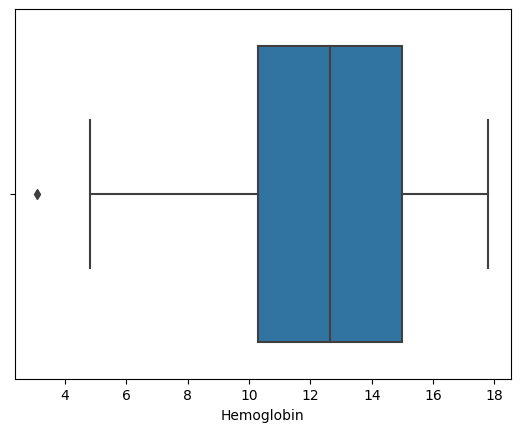

In [229]:
sns.boxplot(x=df['Hemoglobin'],data=df)

In [230]:
df['Hemoglobin']=df['Hemoglobin'].fillna(df['Hemoglobin'].median())

In [231]:
df['Packed_Cell_Volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

<Axes: xlabel='Packed_Cell_Volume'>

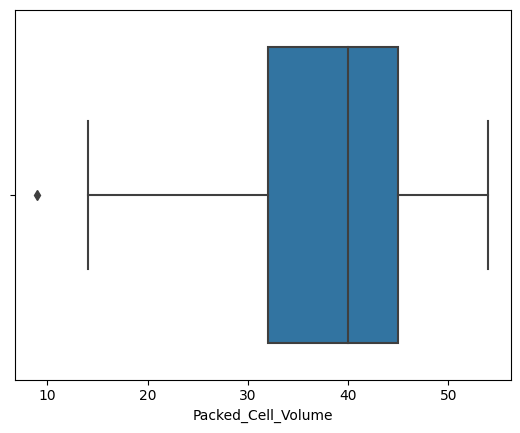

In [232]:
sns.boxplot(x=df['Packed_Cell_Volume'],data=df)

In [233]:
df['Packed_Cell_Volume']=df['Packed_Cell_Volume'].fillna(df['Packed_Cell_Volume'].median())

In [234]:
df['White_Blood_Cell_Count'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

<Axes: xlabel='White_Blood_Cell_Count'>

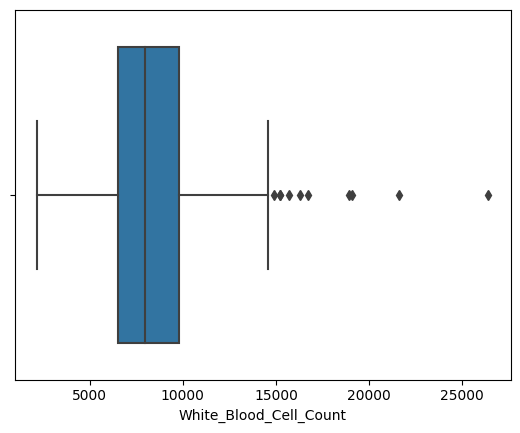

In [235]:
sns.boxplot(x=df['White_Blood_Cell_Count'],data=df)

In [236]:
df['White_Blood_Cell_Count']=df['White_Blood_Cell_Count'].fillna(df['White_Blood_Cell_Count'].median())

In [237]:
df['Red_Blood_Cell_Count']=df['Red_Blood_Cell_Count'].fillna(df['Red_Blood_Cell_Count'].median())

In [239]:
df['Hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

In [240]:
df['Hypertension']=df['Hypertension'].fillna(statistics.mode(df['Hypertension']))

In [241]:
df['Diabetes_Mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [242]:
df['Hypertension']=df['Hypertension'].fillna(statistics.mode(df['Hypertension']))

In [243]:
df['Coronary_Arery_Diesease']=df['Coronary_Arery_Diesease'].fillna(statistics.mode(df['Coronary_Arery_Diesease']))

In [244]:
df.head(20)

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Arery_Diesease,Appetite,Peda_Edema,Aanemia,Class
0,48.0,80.0,1.020000,1.000000,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020000,4.000000,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,0
2,62.0,80.0,1.010000,2.000000,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005000,4.000000,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010000,2.000000,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
5,60.0,90.0,1.015000,3.000000,0.0,normal,normal,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,0
6,68.0,70.0,1.010000,0.000000,0.0,normal,normal,notpresent,notpresent,100.0,...,36.0,8000.0,4.8,no,no,no,good,no,no,0
7,24.0,80.0,1.015000,2.000000,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,0
8,52.0,100.0,1.015000,3.000000,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,0
9,53.0,90.0,1.020000,2.000000,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,0


In [245]:
df['Appetite']=df['Appetite'].fillna(statistics.mode(df['Appetite']))

In [247]:
df['Peda_Edema']=df['Peda_Edema'].fillna(statistics.mode(df['Peda_Edema']))

In [249]:
df['Aanemia']=df['Aanemia'].fillna(statistics.mode(df['Aanemia']))

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood_Pressure           400 non-null    float64
 2   Specific_Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red_Blood_Cells          400 non-null    object 
 6   Pus_Cell                 400 non-null    object 
 7   Pus_Cell_Clumps          400 non-null    object 
 8   Bacteria                 400 non-null    object 
 9   Blood_Glucose_Random     400 non-null    float64
 10  Blooad_Urea              400 non-null    float64
 11  Serum_Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

In [254]:
numerical_col=[col for col in df.columns if df[col].dtypes !='O']

In [255]:
numerical_col


['Age',
 'Blood_Pressure',
 'Specific_Gravity',
 'Albumin',
 'Sugar',
 'Blood_Glucose_Random',
 'Blooad_Urea',
 'Serum_Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed_Cell_Volume',
 'White_Blood_Cell_Count',
 'Red_Blood_Cell_Count',
 'Class']

In [ ]:
# Correlation Analysis:
# 1.What are the correlations between numerical variables like Age, Blood Pressure, Blood Glucose Random, Packed Cell Volume, and White Blood Cell Count?
# 2.Is there a significant correlation between Blood Glucose Random and Diabetes Mellitus?

# Comparative Analysis:
# 3.How do Age, Blood Pressure, and Blood Glucose Random compare between patients with and without Hypertension?
# 4.How do the levels of Albumin and Sugar vary between different classes?

# Feature Importance:
# 5.Which features are the most important predictors for the class variable?
# 6.How does Packed Cell Volume influence the likelihood of having a specific class?

# Missing Data Analysis:
# 7.Which features have the most missing data?
# 8.How does the presence of missing data affect the prediction of the class?

# Descriptive Statistics:
# 9.What are the mean, median, and standard deviation of numerical features like Age and Blood Pressure?
# 10.What is the distribution of specific gravity across different age groups?

# Association Rules:
# 11.Are there any notable associations between Pus Cell Clumps and Bacteria presence?
# 12.How often do Hypertension and Diabetes Mellitus co-occur in the dataset?

# Trend Analysis:
# 13.Are there any observable trends in Blood Glucose Random across different age groups?
# 14.Does Packed Cell Volume vary with Age?

# Classification:
# 15.How well can a logistic regression model predict the class based on key features?
# 16.What is the accuracy of a Random Forest classifier on this dataset?

# Clustering:
# 17.Can we identify distinct clusters of patients based on their lab results?
# 18.How do these clusters relate to the class variable?

# Time Series Analysis (if applicable):
# 19.Are there any time-dependent patterns in the data, such as seasonal variations in Blood Glucose Random levels?
# 20.How do Blood Pressure readings change over time for patients with different classes?

# Survival Analysis (if applicable):
# 21.What are the survival rates for different classes?
# 22.How do factors like Blood Pressure and Age affect survival rates?

# Hypothesis Testing:
# 23.Is there a significant difference in Blood Glucose Random levels between patients with and without Diabetes Mellitus?
# 24.Does the presence of Pus Cell Clumps significantly affect the class?

# Outlier Detection:
# 25.Are there any outliers in the Blood Glucose Random values?
# 26.How do outliers in Age affect the analysis?

# Principal Component Analysis (PCA):
# 27.How many principal components are needed to explain most of the variance in the dataset?
# 28.How do the principal components separate the classes?

# Chi-Square Test:
# 29.Is there a significant association between Red Blood Cells and the class?
# 30.How does the presence of Pus Cell Clumps relate to the class?

# ANOVA:
# 31.Are there significant differences in Blood Glucose Random levels across different levels of Albumin?
# 32.How do White Blood Cell Counts vary across different classes?
# 33.What does the correlation heatmap of numerical variables look like?

# Box Plots:
# 34.How do Age, Blood Pressure, and Blood Glucose Random distributions differ across classes?
# 35.What are the distributions of Packed Cell Volume for different classes?

# Violin Plots:
# 36.How does the distribution of Blood Glucose Random vary for patients with and without Diabetes Mellitus?

# Histograms:
# 37.What is the age distribution of patients in the dataset?
# 38.How are the Blood Glucose Random values distributed?

# Scatter Plots:
# 39.What is the relationship between Age and Blood Glucose Random?
# 40.How do Packed Cell Volume and White Blood Cell Count relate?

# Pair Plots:
# 41.How do numerical variables pairwise relate to each other and the class?

# Bar Charts:
# 42.What is the frequency of different levels of Albumin across classes?
# 43.How common is the presence of Pus Cell Clumps in the dataset?

# Line Charts:
# 44.How do Blood Pressure readings vary with Age?
# 45.Are there any trends in Blood Glucose Random values over time?

# Stacked Bar Charts:
# 46.How do the counts of different levels of Red Blood Cells vary across classes?

# Pie Charts:
# 47.What is the proportion of patients with different classes?
# 48.How is the distribution of Pus Cell Clumps?

# Heatmaps:
# 49.How does Packed Cell Volume vary across different levels of Age and Blood Pressure?

# 3D Scatter Plots:
# 50.How do Age, Blood Pressure, and Blood Glucose Random relate in a 3D space?

# Boxen Plots:
# 51.What are the distributions of Blood Glucose Random and Packed Cell Volume?

# Density Plots:
# 52.What is the density distribution of Blood Glucose Random?

# Swarm Plots:
# 53.How are Blood Pressure values distributed across different classes?

# Facet Grids:
# 54.How do multiple variables like Age and Blood Pressure vary together across different levels of another categorical variable?

# Hexbin Plots:
# 55.What is the hexbin plot of Age and Blood Glucose Random?

# Lollipop Charts:
# 56.How does Blood Glucose Random vary across different levels of Albumin? 

In [262]:
# 1.What are the correlations between numerical variables like Age, Blood Pressure, Blood Glucose Random, Packed Cell Volume, and White Blood Cell Count?
col=['Age','Blood_Pressure','Blood_Glucose_Random','Packed_Cell_Volume','White_Blood_Cell_Count']
correction_mt=df[col].corr()
correction_mt

,Age,Blood_Pressure,Blood_Glucose_Random,Packed_Cell_Volume,White_Blood_Cell_Count
Age,1.000000,0.136316,0.230731,-0.212796,0.093794
Blood_Pressure,0.136316,1.000000,0.150180,-0.289237,0.022177
Blood_Glucose_Random,0.230731,0.150180,1.000000,-0.258200,0.119881
Packed_Cell_Volume,-0.212796,-0.289237,-0.258200,1.000000,-0.175226
White_Blood_Cell_Count,0.093794,0.022177,0.119881,-0.175226,1.000000


<Axes: >

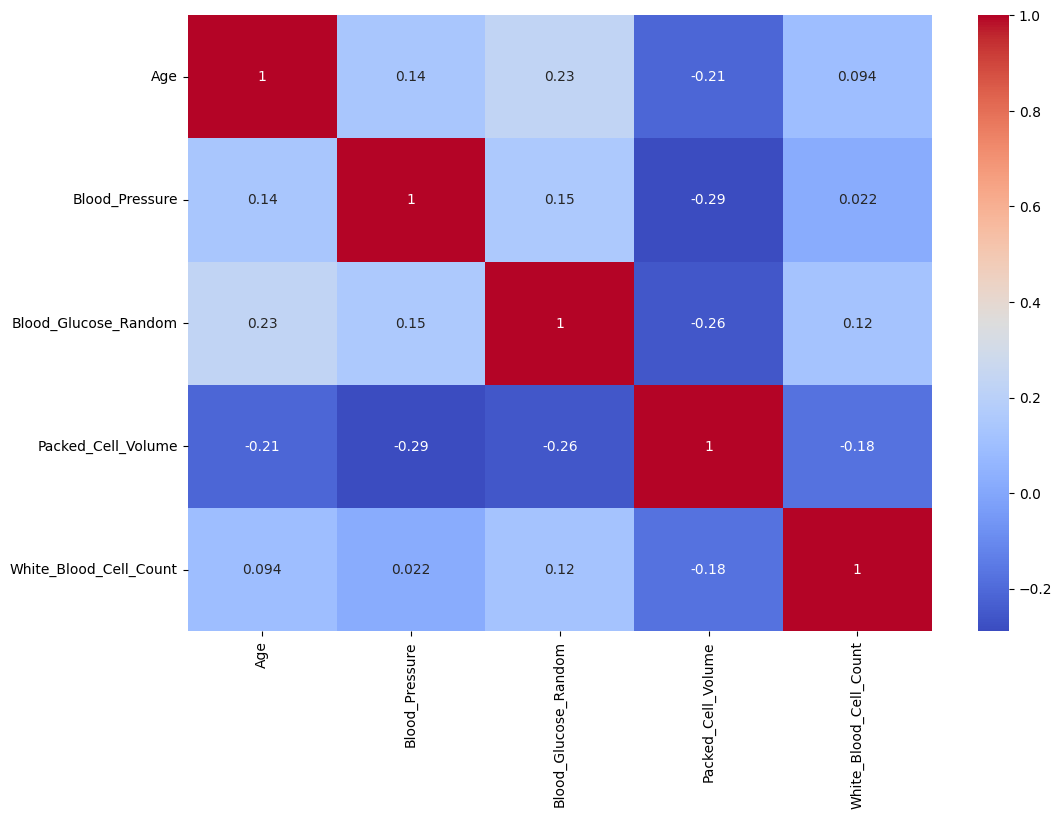

In [266]:
plt.figure(figsize=(12,8))
sns.heatmap(correction_mt,cmap='coolwarm',annot=True)

In [268]:
# 2.Is there a significant correlation between Blood Glucose Random and Diabetes Mellitus?
data=['Blood_Glucose_Random','Diabetes_Mellitus']
df[data].corr()
# No Any Significance relationship between this

C:\Users\satyam saurabh\AppData\Local\Temp\ipykernel_21400\1981420788.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[data].corr()


,Blood_Glucose_Random
Blood_Glucose_Random,1.0


<Axes: xlabel='Hypertension'>

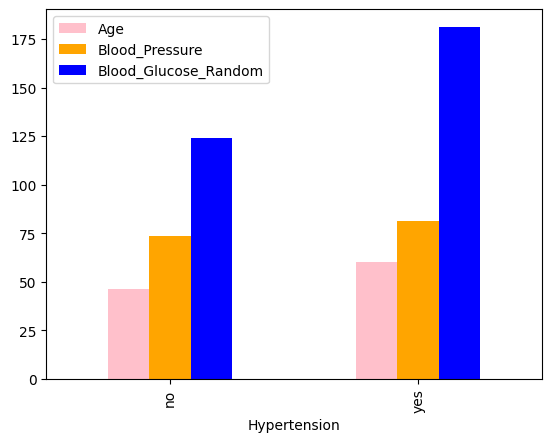

In [271]:
# 3.How do Age, Blood Pressure, and Blood Glucose Random compare between patients with and without Hypertension?
df.groupby('Hypertension').agg({'Age':'mean','Blood_Pressure':'mean','Blood_Glucose_Random':'mean'}).plot(kind='bar',color=['pink','orange','blue'])

In [274]:
# 4.How do the levels of Albumin and Sugar vary between different classes?
df.groupby('Class').agg({'Albumin':'mean','Sugar':'mean'})


,Albumin,Sugar
Class,,
0,1.606780,0.632
1,0.033898,0.000


In [281]:
# 10.What is the distribution of specific gravity across different age group?
def Different_Age_Group(x):
    if(x<18):
        return 'Teenagers'
    elif(x>=18 and x<25):
        return 'Young'
    elif(x>=25 and x<=45):
        return 'Mature'
    else:
        return 'Old'
df['Age_Group']=df['Age'].apply(Different_Age_Group)    

<Axes: xlabel='Age_Group'>

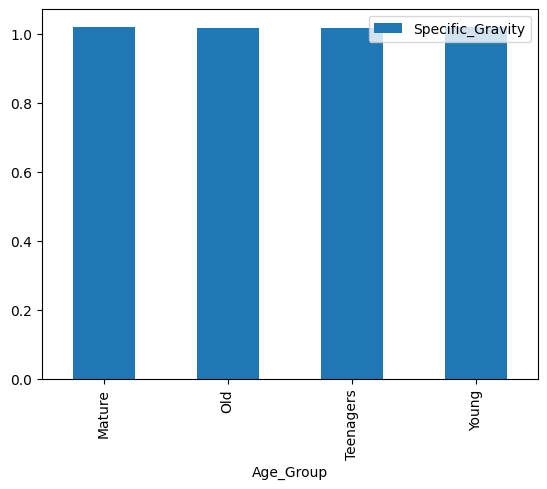

In [282]:
df.groupby('Age_Group').agg({'Specific_Gravity':'mean'}).plot(kind='bar')

In [284]:
# 11.Are there any notable associations between Pus Cell Clumps and Bacteria presence?
df.groupby('Bacteria').agg({'Pus_Cell_Clumps':'count'})

,Pus_Cell_Clumps
Bacteria,
notpresent,378
present,22
